In [8]:
"""
Determine phase and wavelength of Endurance waves
"""

import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/Endurance/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import end_load_data
#import plasma_params_get_density_from_flhr_freq as dflh
import numpy as np 
import matplotlib.pyplot as plt
#import plasmapy
from astropy import units as u  
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/')
import filter_wave_frequency
import plot_spectrogram as ps
import correlation_analysis
from scipy import signal


#%load_ext nb_black
plt.rcParams['figure.figsize'] = [10, 4]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2



mag = end_load_data.mag_dc()
#Index(['tsec', 'Bx', 'By', 'Bz', 'Bmag'], dtype='object')
evlf = end_load_data.efield_vlf()
#Index(['tsec', 'amp'], dtype='object')
ehf = end_load_data.efield_hf()
#dict_keys(['afftpow12', 'afftpow34', 'afreq', 'atimesfft', 'fftsize', 'overlap', 'weight', 'samplerate', 'nfreq', 'nfftlines', 'in_file'])


#VLF data
tvals = evlf.tvlf
wf12 = evlf.dvlf12_mvm
wf34 = evlf.dvlf34_mvm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:41: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


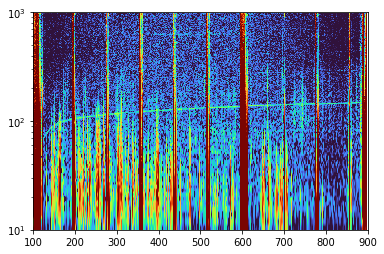

array([[  -7.2976646,  -27.085836 ,  -10.839182 , ..., -133.11066  ,
        -122.70092  , -178.98532  ],
       [  -1.6798289,  -19.599367 ,   -1.2650119, ...,  -98.18814  ,
         -95.29679  , -181.99562  ],
       [ -11.127874 ,   -9.12354  ,   -3.3497453, ...,  -96.841324 ,
         -96.33472  ,         -inf],
       ...,
       [ -35.49954  ,  -40.000347 ,  -37.873188 , ..., -101.725784 ,
         -96.03015  ,         -inf],
       [ -39.11633  ,  -38.748165 ,  -39.744038 , ...,  -99.66889  ,
         -96.81018  , -332.5104   ],
       [ -55.715225 ,  -43.6694   ,  -38.50076  , ..., -118.13077  ,
        -100.211044 ,         -inf]], dtype=float32)

In [7]:
#Spectral overview
fs = evlf.samplerate
freq12, tspec12, power12 = signal.spectrogram(wf12, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
freq34, tspec34, power34 = signal.spectrogram(wf34, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-40], xr=[900,1000],yr=[6000,10000], yscale='linear')
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-40],yr=[0,10000],xr=[100,900], yscale='linear')
ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-40],yr=[10,1000],xr=[100,900], yscale='log')

#ps.

In [8]:
ps.plot_spectrogram(tspec34,freq34,power34,vr=[-100,-40], xr=[0,900],yr=[0,10000], yscale='linear')


NameError: name 'plot_spectrogram' is not defined

/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:41: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


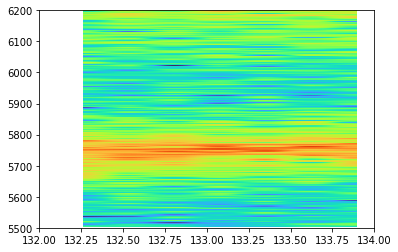

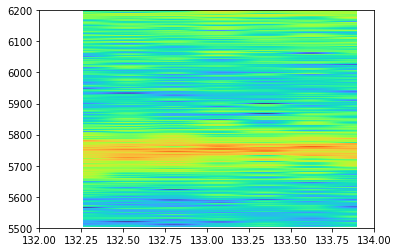

array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]], dtype=float32)

In [9]:
#Identify waveform for polarization analysis

#Determine freq and time range to view spectrogram in order to select a wave
#Note that the actual times we'll use for phase analysis can be more restrictive. 
frplot = [5500, 6200]
trplot = [132, 134]

pmask = np.full_like(power12, 1)

badt = np.squeeze(np.where(tspec12 < trplot[0]))
if len(badt) != 0: pmask[:,badt] = 0
badt = np.squeeze(np.where(tspec12 > trplot[1]))
if len(badt) != 0: pmask[:,badt] = 0
badf = np.squeeze(np.where((freq12 < frplot[0])))
if len(badt) != 0: pmask[badf,:] = 0
badf = np.squeeze(np.where((freq12 > frplot[1])))
if len(badt) != 0: pmask[badf,:] = 0

p12 = power12 * pmask

ps.plot_spectrogram(tspec12,freq12,p12,vr=[-100,-40], xr=trplot,yr=frplot, yscale='linear')



pmask = np.full_like(power34, 1)

badt = np.squeeze(np.where(tspec34 < trplot[0]))
pmask[:,badt] = 0
badt = np.squeeze(np.where(tspec34 > trplot[1]))
pmask[:,badt] = 0
badf = np.squeeze(np.where((freq34 < frplot[0])))
pmask[badf,:] = 0
badf = np.squeeze(np.where((freq34 > frplot[1])))
pmask[badf,:] = 0

p34 = power34 * pmask

ps.plot_spectrogram(tspec34,freq34,p34,vr=[-100,-40], xr=trplot,yr=frplot, yscale='linear')




/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:41: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


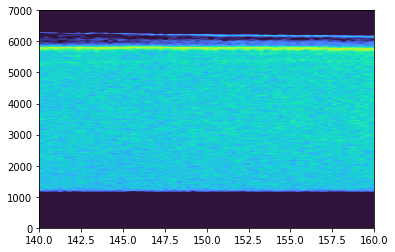

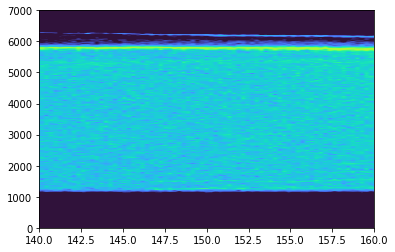

array([[ -86.0053748 ,  -97.76977381,  -83.06910964, ..., -373.70229235,
        -299.14011279, -419.80306303],
       [ -89.01571638, -100.78019189,  -86.07947216, ..., -369.80417182,
        -302.15001209, -422.81335938],
       [-198.92654054, -201.63010648, -192.45057673, ..., -368.09035353,
        -375.4246799 , -553.96140729],
       ...,
       [-260.47745744, -267.84513907, -261.83987732, ..., -395.34125639,
        -388.22631742, -573.04698011],
       [-260.47643244, -267.84588487, -261.83781925, ..., -386.08911804,
        -379.03369507, -573.047063  ],
       [-263.4861531 , -270.85481034, -264.85179542, ..., -404.24629473,
        -388.44528525, -576.05743707]])

In [4]:
#Use butter bandpass filter 


fs = 1/(tvals[1]-tvals[0])
#Isolate waveform for polarization analysis based on above plots
frfft = [1200, 5700]
#trfft = [135, 135.01]
trfft = [140, 150]

trspec = [140,160]
yrspec = [0,7000]

#------------------------------------------------------
#Bandpass filter waveform to preferred freqs and times
#------------------------------------------------------

filt12 = filter_wave_frequency.butter_bandpass_filter(wf12, frfft[0],frfft[1],fs,order=13)
filt34 = filter_wave_frequency.butter_bandpass_filter(wf34, frfft[0],frfft[1],fs,order=13)

#Plot spec to make sure we have isolated (in freq space) desired waveform
freq12z, tspec12z, power12z = signal.spectrogram(filt12, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
freq34z, tspec34z, power34z = signal.spectrogram(filt34, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
ps.plot_spectrogram(tspec12z,freq12z,power12z,vr=[-100,-40],yr=yrspec, xr=trspec, yscale='linear')
ps.plot_spectrogram(tspec34z,freq34z,power34z,vr=[-100,-40],yr=yrspec, xr=trspec, yscale='linear')



In [5]:
#Isolate bandpassed signal in time. 

cond = np.where((tvals > 140) & (tvals < 142))[-1]
tfilt = tvals[cond]
filt12z = filt12[cond]
filt34z = filt34[cond]
wf12z = wf12[cond]
wf34z = wf34[cond]




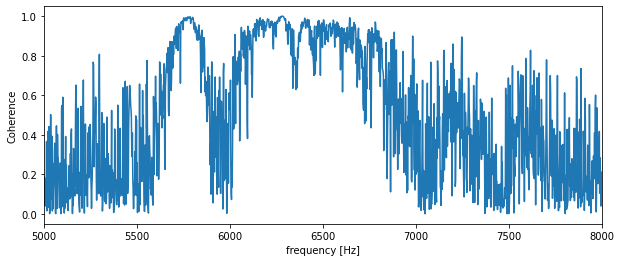

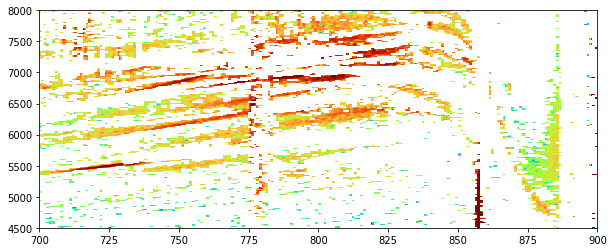

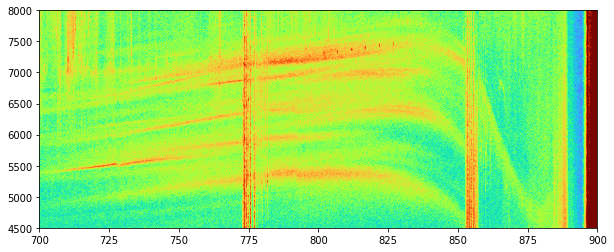

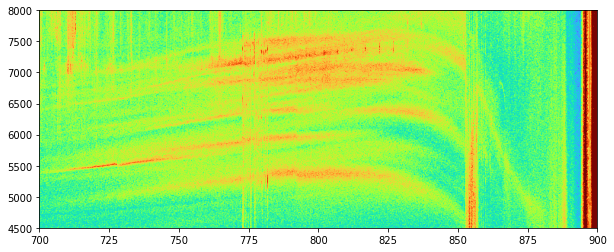

Here


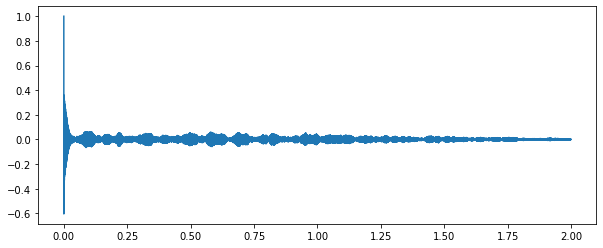

In [114]:

#Calculate coherence b/t two signals
Pxy1d, freqs1d = correlation_analysis.signal_coherence(wf12z,wf34z,fs,nperseg=16384)
plt.plot(freqs1d, Pxy1d)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.yscale('linear')
plt.xlim(5000,8000)
plt.show()



#Determine the sliding spectrum of the cross spectral density
timechunk = 1 #secs
nperseg=16384/6
Pxy, tchunks, freqs = correlation_analysis.cross_spectral_density_spectrogram(wf12,wf34,tvals,fs,timechunk,nperseg=nperseg)


ps.plot_spectrogram(tchunks,freqs,Pxy,vr=[-100,-60], zscale='log',xr=[700,900],yr=[4500,8000])
ps.plot_spectrogram(tspec12,freq12,power12,vr=[-100,-40],yr=[4500,8000],xr=[700,900], yscale='linear')
ps.plot_spectrogram(tspec34,freq34,power34,vr=[-100,-40],yr=[4500,8000],xr=[700,900], yscale='linear')

print("Here")



#Autocorrelation to see how long signal lasts 


mean = np.mean(filt12z)
var = np.var(filt12z)
# Normalized data
ndata = filt12z - mean

deltat = tfilt - tfilt[0]

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)

plt.plot(deltat,acorr)
plt.show()




In [10]:
#Test cross spectral density use for gain and phase 


fs = int(fs)
csd, phase, f = correlation_analysis.cross_spectral_density(wf12z,wf34z,fs,nperseg=16384/4)


# Then calculate cross spectral density
#(csd, f) = mlab.csd(wf12z, wf34z,NFFT=256, Fs=fs,sides='default', scale_by_freq=False)
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(f, csd)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(f, phase)

plt.show()





TypeError: expected a sequence of integers or a single integer, got '4096.0'

In [ ]:
#------------------------------------------------------
#Use an FFT for a bandpass 
#------------------------------------------------------

"""

#Isolate waveform for polarization analysis based on above plots
frfft = [500, 6000]
#trfft = [135, 135.01]
trfft = [140, 150]

trspec = [125,150]
yrspec = [0,7000]

flow = 0.1
fhig = 15000 


wf12_filtered = filter_wave_frequency.fft_bandpass_filter(wf12,flow,fhig,fs)



X_filtered_tst = np.fft.rfft(wf12_filtered)
X = np.fft.rfft(wf12)
freq = np.fft.fftfreq(len(X), d=1./fs)

#NOT SURE WHY, BUT THE FILTERED WAVEFORM IS ABOUT HALF THE AMPLITUDE OF THE ORIGINAL
#WHEN SETTING THE FILTER LIMITS TO ROUGHLY 0 AND 15000 HZ
plt.plot(tvals,wf12,tvals,wf12_filtered)
plt.xlim(170,180)
plt.ylim(-1,1)
plt.show()


plt.plot(freq,np.abs(X), '.',freq,np.abs(X_filtered_tst),'x')
plt.xlim(0,7000)
#plt.ylim(0,10000)
plt.show()




freq12z2, tspec12z2, power12z2 = signal.spectrogram(wf12_filtered, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
#p2 = 10.*np.log10(power12z2)
ps.plot_spectrogram(tspec12z2,freq12z2,power12z2,vr=[-200,0],xr=[10,200],yr=[0,8000], yscale='linear')
ps.plot_spectrogram(tspec12,freq12,power12,vr=[-200,0],xr=[150,200],yr=[0,8000], yscale='linear')

"""

"""
#reduce to desired times only
goodt = np.squeeze(np.where((tvals > trfft[0]) & (tvals < trfft[1])))
filt12 = filt12[goodt]
filt34 = filt34[goodt]

#Plot hodograms 
fig, axs = plt.subplots()
axs.scatter(filt12,filt34)
#maxv = np.max(filt12) gt np.max(filt34)
maxv = max(np.max(filt12), np.max(filt34))
axs.set_xlim(-1*maxv, maxv)
axs.set_ylim(-1*maxv, maxv)
axs.set_aspect(1)

print("here")
"""


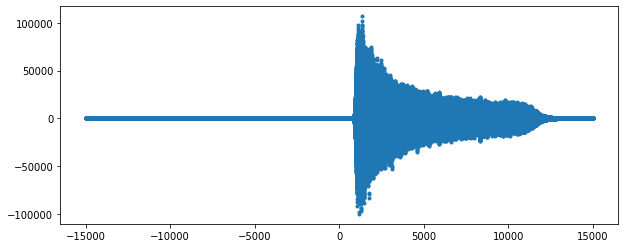

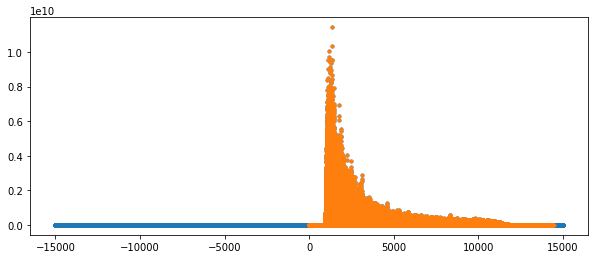

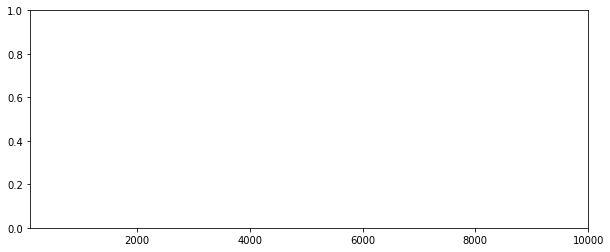

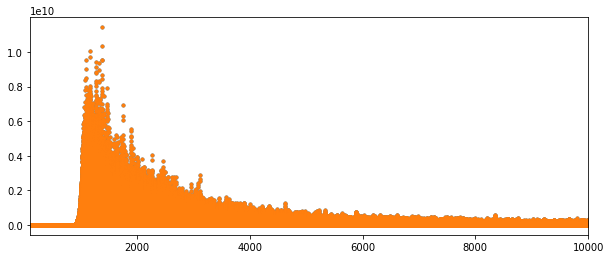

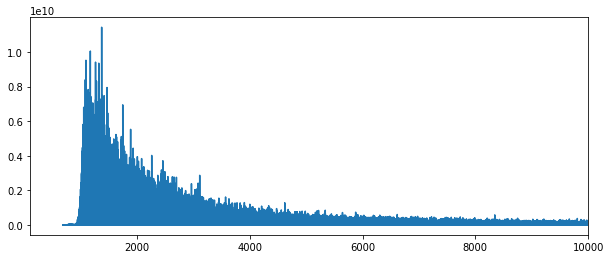

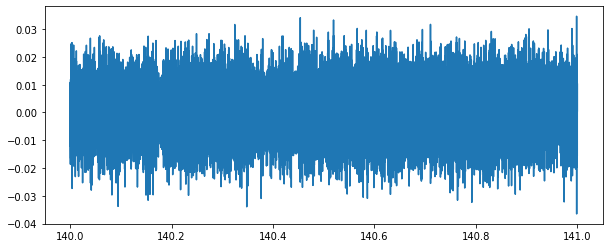

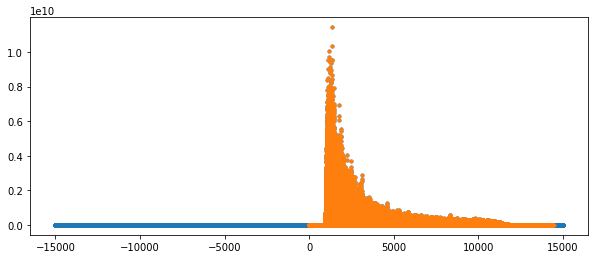

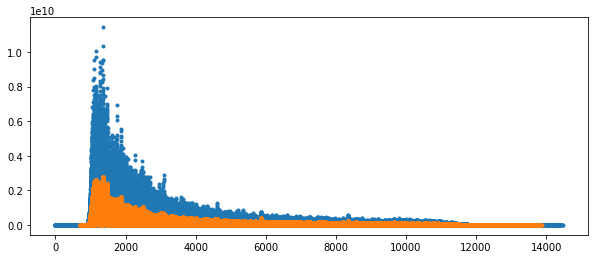

'\n# Get the one-sided specturm\nn_oneside = X.size//2\n# get the one side frequency\nf_oneside = freq[:n_oneside]\n\nplt.figure(figsize = (12, 6))\nplt.plot(f_oneside, np.abs(X[:n_oneside]), \'b\', f_oneside, np.abs(Xsmoo[:n_oneside]), \'g\')\nplt.xlim(5500,8000)\nplt.ylim(0,25000)\nplt.xlabel(\'Freq (Hz)\')\nplt.ylabel(\'FFT Amplitude |X(freq)|\')\nplt.show()\n\nprint("Here")\n'

In [49]:
#Take the FFT of the bandpassed data to see if there are any short wavelength effects 

from scipy.fftpack import rfft, irfft, fftfreq
import signal_smoothing 
from copy import copy



X = rfft(filt12)
freq = fftfreq(filt12.size, d=tvals[1]-tvals[0])

plt.plot(freq,X,'.')
plt.show()


X = X**2
cutoff_idx = X < 20

X2 = copy(X)
X2[cutoff_idx] = np.nan

plt.plot(freq,X2)
plt.xlim(100,10000)
plt.show()



X2smoo = signal_smoothing.sliding_box_avg(X2,box_pts=50)

plt.plot(freq,X2,'.',freq,X2smoo,'.')
plt.show()

#plt.plot(freq,X)
#plt.show()





"""
# Get the one-sided specturm
n_oneside = X.size//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b', f_oneside, np.abs(Xsmoo[:n_oneside]), 'g')
plt.xlim(5500,8000)
plt.ylim(0,25000)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

print("Here")
"""



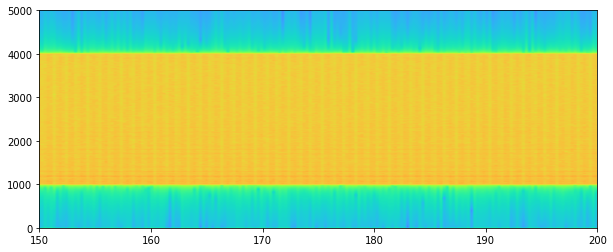

array([[ -95.56684566, -154.00990153, -169.03657109, ..., -169.50689874,
        -163.70571147, -150.68787582],
       [ -98.57719821, -157.02027924, -172.04690855, ..., -172.51733206,
        -166.71613759, -153.69825353],
       [-206.45535307, -261.50323075, -282.86049512, ..., -272.31343123,
        -266.99494442, -258.18208972],
       ...,
       [-272.56021259, -327.27351332, -331.96882607, ..., -333.49197996,
        -337.72517091, -322.44108355],
       [-272.56022309, -327.27257706, -331.96862585, ..., -333.49155386,
        -337.72491336, -322.44117115],
       [-275.57052804, -330.28268838, -334.97969761, ..., -336.50183125,
        -340.73372588, -325.45149514]])

In [88]:
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq
from scipy import signal


time   = tvals
signal2 = np.cos(5*np.pi*time) + np.cos(7*np.pi*time)

W = fftfreq(signal2.size, d=time[1]-time[0])
f_signal = rfft(signal2)
flow = 1000 
fhig = 4000

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<2*flow)] = 0
cut_f_signal[(W>2*fhig)] = 0

cut_signal = irfft(cut_f_signal)

freq12z2, tspec12z2, power12z2 = signal.spectrogram(cut_signal, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
#p = 10.*np.log10(power12z2)
ps.plot_spectrogram(tspec12z2,freq12z2,power12z2,vr=[-400,0],xr=[150,200],yr=[0,5000], yscale='linear',zscale='log')








In [ ]:
#------------------------------------------------------
#Use an FFT for a bandpass 
#------------------------------------------------------


#Isolate waveform for polarization analysis based on above plots
frfft = [500, 6000]
#trfft = [135, 135.01]
trfft = [140, 150]

trspec = [125,150]
yrspec = [0,7000]



flow = 0.1
fhig = 15000 


wf12_filtered = filter_wave_frequency.fft_bandpass_filter(wf12,flow,fhig,fs)



X_filtered_tst = np.fft.rfft(wf12_filtered)
X = np.fft.rfft(wf12)
freq = np.fft.fftfreq(len(X), d=1./fs)

#NOT SURE WHY, BUT THE FILTERED WAVEFORM IS ABOUT HALF THE AMPLITUDE OF THE ORIGINAL
#WHEN SETTING THE FILTER LIMITS TO ROUGHLY 0 AND 15000 HZ
plt.plot(tvals,wf12,tvals,wf12_filtered)
plt.xlim(170,180)
plt.ylim(-1,1)
plt.show()


plt.plot(freq,np.abs(X), '.',freq,np.abs(X_filtered_tst),'x')
plt.xlim(0,7000)
#plt.ylim(0,10000)
plt.show()




freq12z2, tspec12z2, power12z2 = signal.spectrogram(wf12_filtered, fs, nperseg=16384,noverlap=16384/2,window='hann') #, return_onesided=1)
#p2 = 10.*np.log10(power12z2)
ps.plot_spectrogram(tspec12z2,freq12z2,power12z2,vr=[-200,0],xr=[10,200],yr=[0,8000], yscale='linear')
ps.plot_spectrogram(tspec12,freq12,power12,vr=[-200,0],xr=[150,200],yr=[0,8000], yscale='linear')



"""
#reduce to desired times only
goodt = np.squeeze(np.where((tvals > trfft[0]) & (tvals < trfft[1])))
filt12 = filt12[goodt]
filt34 = filt34[goodt]

#Plot hodograms 
fig, axs = plt.subplots()
axs.scatter(filt12,filt34)
#maxv = np.max(filt12) gt np.max(filt34)
maxv = max(np.max(filt12), np.max(filt34))
axs.set_xlim(-1*maxv, maxv)
axs.set_ylim(-1*maxv, maxv)
axs.set_aspect(1)

print("here")
"""
